## Algemeen, data inladen

In [1]:
import pandas as pd
import datetime
from configparser import ConfigParser
import json, requests


pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', 500)
PANDAS_FILE = '../simplicate_cache/hours.pd'
df = pd.read_pickle(PANDAS_FILE)

pd.options.display.float_format = '{:,.1f}'.format
#df['turnover'] = df.apply(lambda a: (a['hours']+a['corrections']) * (a['tariff'] if a['tariff'] > 0 else a['service_tariff']), axis=1)
#df['turnover'] = df.apply(lambda a: 0 if a['project_number'] == 'TOR-3'  and a['service'] == 'Development Sprints Q1' else a['turnover'], axis=1)
#df['week'] = df.apply(lambda a: datetime.datetime.strptime(a['day'],'%Y-%m-%d').isocalendar()[1], axis=1)
df[-20:]

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
9869,Angela Duijs,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Office,normal,0.0,Internal,False,0.0,0.0,2021-04-05,to_forward,0.0,0.0,14
9870,Joost Cornelissen,Qikker Online B.V.,project:0bdededed56effb54c13c77ab857ae53,Verlof / Leave,,Standaard dienstverlening,absence,0.0,Feestdagenverlof / National holidays leave,False,0.0,9.0,2021-04-05,projectmanager_approved,0.0,0.0,14
9871,Mandy Dorée,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,0.5,2021-04-05,to_forward,0.0,0.0,14
9872,Stefan Roovers,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Teambuilding,normal,0.0,Internal,False,0.0,0.8,2021-04-05,to_forward,0.0,0.0,14
9873,Robin Veer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,0.5,2021-04-05,to_forward,0.0,0.0,14
9874,George Tsimenis,Qikker Online B.V.,project:0bdededed56effb54c13c77ab857ae53,Verlof / Leave,,Standaard dienstverlening,absence,0.0,Feestdagenverlof / National holidays leave,False,0.0,8.0,2021-04-05,projectmanager_approved,0.0,0.0,14
9875,Gerben van Dijk,Qikker Online B.V.,project:0bdededed56effb54c13c77ab857ae53,Verlof / Leave,,Standaard dienstverlening,absence,0.0,Feestdagenverlof / National holidays leave,False,0.0,8.0,2021-04-05,projectmanager_approved,0.0,0.0,14
9876,Mandy Dorée,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Teambuilding,normal,0.0,Internal,False,0.0,0.5,2021-04-05,to_forward,0.0,0.0,14
9877,Hans-Peter Harmsen,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Finance,normal,0.0,Internal,False,0.0,3.0,2021-04-06,to_forward,0.0,0.0,14
9878,Hans-Peter Harmsen,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Finance,normal,0.0,Internal,False,0.0,0.5,2021-04-06,to_forward,0.0,0.0,14


In [2]:
df['turnover'].sum()

846595.8500000034

In [3]:
tor = df.query('project_number == "TOR-3"')     
tor.groupby(['service'])[['hours','turnover']].sum()

,hours,turnover
service,,
Development Sprints Q1,"1,889.2",0.0
TOR 3.0 Fase 2 Ameland 2021,16.0,"1,380.0"
TOR 3.0 Fase 2 Schiermonnikoog 2021,21.2,"1,900.6"
TOR 3.0 Fase 2 Texel 2021,12.0,"1,140.0"
TOR 3.0 fase 2,24.0,"3,018.8"


In [4]:
tor.query('service != "Development Sprints Q1"')

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
3642,Chris Neven,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Front-end Development,True,77.5,4.0,2021-02-04,projectmanager_approved,0.0,310.0,5
3697,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Back-end Development,False,110.0,0.0,2021-02-05,forwarded,0.0,0.0,5
3913,Richard van Willegen,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Front-end Development,False,95.0,0.0,2021-02-08,forwarded,0.0,0.0,6
4396,Richard van Willegen,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Schiermonnikoog 2021,normal,95.0,Front-end Development,True,95.0,0.5,2021-02-11,projectmanager_approved,0.0,47.5,6
4568,Sho Stegmeijer,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Front-end Development,True,95.0,3.0,2021-02-12,projectmanager_approved,0.0,285.0,6
4597,Sho Stegmeijer,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Front-end Development,True,95.0,5.0,2021-02-12,projectmanager_approved,0.0,475.0,6
4705,Richard van Willegen,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Front-end Development,False,95.0,0.0,2021-02-15,to_forward,0.0,0.0,7
4851,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Schiermonnikoog 2021,normal,95.0,Front-end Development,True,95.0,0.2,2021-02-16,projectmanager_approved,0.0,23.8,7
4901,Chris Neven,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 Fase 2 Ameland 2021,normal,95.0,Back-end Development,True,77.5,4.0,2021-02-16,projectmanager_approved,0.0,310.0,7
5013,Chris Neven,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,TOR 3.0 fase 2,normal,95.0,Front-end Development,False,85.0,0.0,2021-02-17,forwarded,0.0,0.0,7


## Focus op gewerkte uren, laat vrij/ziek eruit

In [5]:
# type can be 'normal', 'absence' or 'leave'
worked = df.query( 'type=="normal" ')
worked.describe()

,service_tariff,tariff,hours,corrections,turnover,week
count,"9,685.0","9,685.0","9,685.0","9,685.0","9,685.0","9,685.0"
mean,43.6,40.3,2.1,-0.1,87.4,7.0
std,50.3,76.5,2.4,0.7,205.4,3.9
min,0.0,0.0,0.0,-8.0,-0.0,1.0
25%,0.0,0.0,0.5,0.0,0.0,4.0
50%,0.0,0.0,1.0,0.0,0.0,7.0
75%,95.0,85.0,3.0,0.0,50.0,10.0
max,140.0,"6,000.0",11.0,2.0,"6,000.0",53.0


## Overzicht per dag/week

In [6]:
worked.groupby(['week','day'])[['hours','turnover']].sum()

hours  turnover
week day                        
1    2021-01-04  305.2   3,600.0
     2021-01-05  336.2  15,099.0
     2021-01-06  294.2  15,275.7
     2021-01-07  299.2  13,805.7
     2021-01-08  241.8  12,863.1
...                ...       ...
14   2021-04-05    2.5       0.0
     2021-04-06  118.2   3,775.0
53   2021-01-01    0.0       0.0
     2021-01-02    2.0      42.5
     2021-01-03    2.5       0.0

[96 rows x 2 columns]

In [29]:
worked.groupby(['week'])[['hours','turnover']].sum()

,hours,turnover
week,,
1,"1,481.3","60,685.9"
2,"1,582.5","68,502.4"
3,"1,553.5","56,854.1"
4,"1,525.5","64,423.9"
5,"1,580.2","53,498.8"
6,"1,459.1","70,550.3"
7,"1,630.5","63,989.9"
8,"1,512.0","69,048.3"
9,"1,649.0","75,680.4"


## Per persoon

In [25]:
teamview = pd.DataFrame( worked )
team = sorted([str(t) for t in teamview.employee.unique()])
for t in team:
    teamview[t] = teamview.apply(lambda a: a['turnover'] if a['employee'] == t else 0, axis=1)
cols= ['hours','turnover'] + team
pppw = teamview.groupby(['week'])[cols].sum().query('turnover > 0').T
pppw = pppw.drop( ['hours','turnover','Freelancer','Hans-Peter Harmsen', 'Gert Braun', 'Richard de Boer', 
                   'Joost Cornelissen', 'Jasper Bok', 'Mel Schuurman', 'Martijn van Klaveren', 
                   'Angela Duijs', 'Lunah Smits','Michiel Willekens', 'Wouter Gerrits'])
pppw.loc['mean'] = pppw.mean()
cols = ['week'+str(col) for col in pppw.columns]
pppw.columns = cols
maxVal = 3000
for col in cols:
    pppw[col] = pppw[col].where(pppw[col] < maxVal, maxVal)
pppw

,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week53
Bas Colenbrander,680.0,640.0,"1,340.0","2,315.0",170.0,"1,077.5",440.0,"2,551.2","1,221.2","2,185.0","2,563.8","1,510.0",380.0,0.0,0.0
Caspar Geerlings,435.0,"1,159.5","1,030.0",511.8,"1,069.5",972.2,735.0,890.8,769.2,"1,642.5","1,190.0",975.0,"1,731.8",0.0,0.0
Chris Neven,"2,125.0","3,000.0",212.5,0.0,310.0,340.0,310.0,0.0,523.1,0.0,0.0,0.0,0.0,0.0,0.0
Eva Korteweg,762.5,530.0,"1,070.0",587.5,183.8,200.0,383.8,585.0,"1,543.8","1,442.5",783.8,"1,160.0",666.2,400.0,0.0
Fadhlur Zahri,"1,064.2",492.7,778.5,"1,787.5","1,536.5","1,685.8","1,180.0","1,444.0","2,271.8","2,713.5","3,000.0","1,352.9","1,670.2",0.0,0.0
Filipe José Mariano dos Santos,"2,720.0","2,260.0","2,305.0","2,720.0","2,550.0",680.0,"2,897.5","3,000.0","2,885.0","3,000.0","3,000.0","3,000.0",680.0,0.0,0.0
Geert-Jan van Mastrigt,"2,115.0","2,040.0","1,848.8","1,912.5","1,275.0","2,152.5","1,912.5",886.2,"1,810.0","1,615.0","1,572.5",0.0,0.0,0.0,0.0
George Tsimenis,"3,000.0","3,000.0","3,000.0","2,970.0",440.0,"3,000.0","2,060.0","2,205.0","2,350.0","3,000.0","2,200.0","3,000.0",0.0,0.0,0.0
Gerben van Dijk,"2,345.0","2,681.2","2,566.2","1,573.8","1,987.5","3,000.0","1,423.8","2,412.5","1,861.2","2,647.5","1,567.5","2,911.2","2,627.5",0.0,0.0
Gijs Kattenberg,"3,000.0","2,750.0","2,345.0","1,757.5","1,562.5","1,776.0","1,913.4","3,000.0","2,415.8","1,415.0","1,695.0","3,000.0","2,339.0",0.0,0.0


In [9]:
[str(col) for col in pppw.columns]

['week1',
 'week2',
 'week3',
 'week4',
 'week5',
 'week6',
 'week7',
 'week8',
 'week9',
 'week10',
 'week11',
 'week12',
 'week13',
 'week14',
 'week53']

In [10]:
!pip install matplotlib

In [11]:
%matplotlib inline


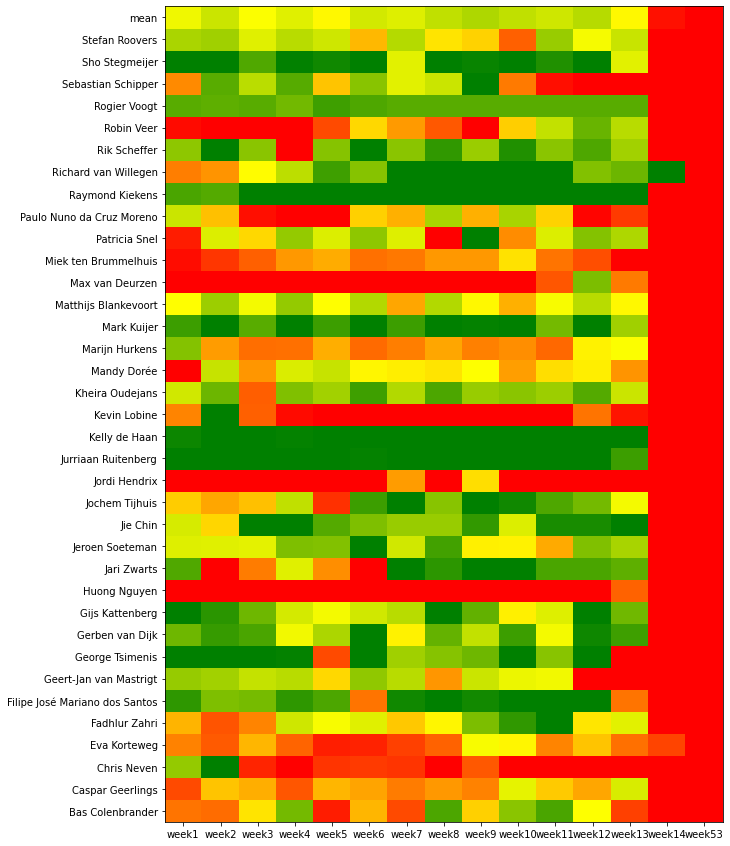

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['figure.figsize'] = [10, 15]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.pcolor(pppw, cmap=cmap)
plt.yticks(np.arange(0.5, len(pppw.index), 1), pppw.index)
plt.xticks(np.arange(0.5, len(pppw.columns), 1), pppw.columns)
#plt.set_size(500,800)
plt.show()

## Specifics
### Werk door een medewerker in een week

In [13]:
def person_week( employee, week ):
    filtered = df.query( f'employee == "{employee}" and week=={week}' )
    print( filtered.groupby(['week','day','project_name'])[['hours','corrections','turnover']].sum())
    totals = filtered[['hours','corrections','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[2])}')    
    
    
person_week( 'Jordi Hendrix', 2)    

                              hours  corrections  turnover
week day        project_name                              
2    2021-01-11 Internal        1.0          0.0       0.0
                TOR 3.0         7.0          0.0       0.0
     2021-01-12 Internal        0.0          0.0       0.0
                TOR 3.0         8.0          0.0       0.0
     2021-01-14 TOR 3.0         8.0          0.0       0.0
     2021-01-15 Internal        0.5          0.0       0.0
                TOR 3.0         7.5          0.0       0.0
Totals 32, €0


In [14]:
df.query( f'employee ==  "Jordi Hendrix" and week==2' )

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
741,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,1.0,2021-01-11,projectmanager_approved,0.0,0.0,2
742,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,7.0,2021-01-11,projectmanager_approved,0.0,0.0,2
908,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.0,2021-01-12,forwarded,0.0,0.0,2
909,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,8.0,2021-01-12,projectmanager_approved,0.0,0.0,2
1229,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,8.0,2021-01-14,projectmanager_approved,0.0,0.0,2
1382,Jordi Hendrix,TOR groep,project:5fdd3f799c981c6dfeaad60b7a7437df,TOR 3.0,TOR-3,Development Sprints Q1,normal,95.0,Back-end Development,False,95.0,7.5,2021-01-15,projectmanager_approved,0.0,0.0,2
1383,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,0.0,2021-01-15,forwarded,0.0,0.0,2
1384,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.5,2021-01-15,projectmanager_approved,0.0,0.0,2


In [15]:
person_week( 'Filipe José Mariano dos Santos', 4)

                                   hours  corrections  turnover
week day        project_name                                   
4    2021-01-25 CopyCoin M&S 2021    7.0          0.0     595.0
                Internal             1.0          0.0       0.0
     2021-01-26 CopyCoin M&S 2021    2.5          0.0     212.5
                Internal             5.5          0.0       0.0
     2021-01-27 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-28 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-29 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
Totals 40, €2720


In [16]:
person_week( 'Jordi Hendrix', 4)

                              hours  corrections  turnover
week day        project_name                              
4    2021-01-25 Internal        1.0          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-26 Internal        0.5          0.0       0.0
                TOR 3.0         7.8         -7.8       0.0
     2021-01-28 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-29 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
Totals 31, €0


### Werk aan een specifiek project in eenweek

In [17]:
def project_week( project, week ):
    filtered = df.query( f'project_number == "{project}" and week=={week}' )
    print( filtered.groupby(['week','day','employee'])[['hours','turnover']].sum())
    totals = filtered[['hours','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[1])}')    
    
project_week( 'TOR-3', 4)


                                      hours  turnover
week day        employee                             
4    2021-01-25 Chris Neven             7.5       0.0
                Eva Korteweg            3.0       0.0
                Jordi Hendrix           7.0       0.0
                Kevin Lobine            7.2       0.0
                Mandy Dorée             2.2       0.0
                Marijn Hurkens          7.5       0.0
                Richard de Boer         1.0       0.0
     2021-01-26 Chris Neven             8.0       0.0
                Eva Korteweg            2.5       0.0
                Jordi Hendrix           7.8       0.0
                Kevin Lobine            8.0       0.0
                Mandy Dorée             1.5       0.0
                Marijn Hurkens          7.5       0.0
                Richard de Boer         2.0       0.0
                Richard van Willegen    2.5       0.0
     2021-01-27 Chris Neven             8.5       0.0
                Kevin Lobine

## Productiviteit

In [18]:

def percentages(working):
    tot_hours = working['hours'].sum()
    print( 'tot hours', tot_hours)
    
    client_hours = working.query('organization not in ("Oberon", "Qikker Online B.V.")')['hours'].sum()
    print( 'client hours', client_hours)
    
    
    billable_hours = working.query('tariff > 0 or service_tariff>0')['hours'].sum()+working.query('tariff > 0 or service_tariff>0')['corrections'].sum()
    print( 'billiable hours', billable_hours)
    
    productivity = round( client_hours / tot_hours * 100,0)
    print( f'productief {productivity:.0f}%' )
    
    billable = round( billable_hours / tot_hours * 100,0)
    print( f'billable {billable:.0f}%' )


### Productiviteit van iedereen

In [19]:
working = df.query('type=="normal"')
percentages( working )

tot hours 20113.48333333333
client hours 11902.083333333332
billiable hours 10796.250000000035
productief 59%
billable 54%


### Productiviteit productiemensen

In [20]:
production_users = ['Gerben van Dijk', 'Sebastian Schipper', 'Filipe José Mariano dos Santos', 'Geert-Jan van Mastrigt', 'George Tsimenis', 'Marijn Hurkens', 'Kevin Lobine', 'Stefan Roovers', 'Bas Colenbrander', 'Caspar Geerlings', 'Jie Chin', 'Chris Neven', 'Fadhlur Zahri', 'Gijs Kattenberg', 'Jari Zwarts', 'Jasper Bok', 'Jeroen Soeteman', 'Jochem Tijhuis', 'Jordi Hendrix', 'Jurriaan Ruitenberg', 'Mark Kuijer', 'Matthijs Blankevoort', 'Paulo Nuno da Cruz Moreno', 'Raymond Kiekens', 'Richard van Willegen', 'Rik Scheffer', 'Robin Veer', 'Rogier Voogt', 'Sho Stegmeijer', 'Patricia Snel', 'Eva Korteweg', 'Kelly de Haan', 'Kheira Oudejans', 'Mandy Dorée', 'Miek ten Brummelhuis']
working = df.query(f'type=="normal" and employee in {production_users}')
percentages( working )

tot hours 15475.0
client hours 11292.083333333332
billiable hours 10295.500000000033
productief 73%
billable 67%


## Productivteit per persoon

In [21]:
for user in production_users:
    working = df.query(f'type=="normal" and employee == "{user}"')
    print( user )
    percentages( working )
    print()

Gerben van Dijk
tot hours 500.0
client hours 361.25
billiable hours 328.5
productief 72%
billable 66%

Sebastian Schipper
tot hours 392.0
client hours 216.25
billiable hours 216.25
productief 55%
billable 55%

Filipe José Mariano dos Santos
tot hours 512.0
client hours 416.0
billiable hours 369.5
productief 81%
billable 72%

Geert-Jan van Mastrigt
tot hours 247.75
client hours 221.5
billiable hours 221.5
productief 89%
billable 89%

George Tsimenis
tot hours 497.75
client hours 322.25
billiable hours 322.25
productief 65%
billable 65%

Marijn Hurkens
tot hours 499.5
client hours 432.75
billiable hours 403.0
productief 87%
billable 81%

Kevin Lobine
tot hours 504.0
client hours 421.25
billiable hours 388.5
productief 84%
billable 77%

Stefan Roovers
tot hours 406.0
client hours 248.0
billiable hours 248.0
productief 61%
billable 61%

Bas Colenbrander
tot hours 511.75
client hours 255.0
billiable hours 222.5
productief 50%
billable 43%

Caspar Geerlings
tot hours 507.0
client hours 135.2

## Interne uren

In [22]:
working.query('tariff == 0 and service_tariff==0').groupby(['project_name','service'])['hours'].sum()

project_name  service                      
Internal      Finance                         10.0
              HRM                              5.2
              ObSessions - Improve Oberon     47.2
              ObSessions - Improve yourself   11.5
              Office                           4.5
              Operations                      50.2
              Other / Unaccountable           14.0
              Recruitment                      0.8
              Sales                            2.0
              Teambuilding                    24.5
Name: hours, dtype: float64

## Uren submitten

In [23]:
def post(url_path: str, post_fields: dict):
    headers = {
        'Authentication-Key': api_key,
        'Authentication-Secret': api_secret,
        'Content-type': 'application/json',
        'Accept': 'text/plain',
    }
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    print( 'POST', url, post_fields, headers)
    return requests.post(url, json=post_fields, headers=headers)


def get(url_path: str):
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    headers = {'Authentication-Key': api_key, 'Authentication-Secret': api_secret}
    response = requests.get(url, headers=headers, timeout=15)
    return response.json()['data']

In [24]:
print( get( '/hrm/employee?q[full_name]="Hans-Peter Harmsen"') )

NameError: name 'subdomain' is not defined

In [ ]:
employee_id = get( '/hrm/employee?q[name]=Hans-Peter Harmsen')[0]['id']
project_id = get('/projects/project?q[project_number]=OBE-1')[0]['id']
service_id = get(f'/projects/service?q[project_id]={project}&q[name]=Finance')[0]['id']
hourstype_id = get('/hours/hourstype?q[label]=Internal')[0]['id']

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d %H:%M:%S'),
  "note": "test vanuit Jupyter"
}
postdata

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d'),
  "note": "test vanuit Jupyter 2"
}
postdata

In [ ]:
#res = post( '/hours/hours', post_fields = postdata)
#res

In [ ]:
def find_bookable1( zoek):
    zoek = zoek.lower()
    projects = get('/projects/project?q[active]=True')
    projects = {p['id']:p['organization']['name']+ ' ' + p['name'] for p in projects}
    services = get(f'/projects/service?q[status]=open')

    res = []
    for s in services:
        if not s['project_id'] in projects.keys() or not s.get('name'):
            continue
        found_services = []
        for h in s.get('hour_types',[]):
            full_name = projects[s['project_id']] + ' ' + s['name'] + ' ' + h['hourstype']['label']
            full_name = full_name.replace( ' Internal ', ' ')
            if not full_name.lower().count(zoek):
                continue
            found_services += [full_name]
            print( s['id'] + ' ' + full_name)
            res += [( s['project_id'], s['id'], h['id'] )]
    if len(res) == 1:
        return res[0]
    if len(res) == 0:
        print( 'No service found')
    else:
        print( 'Multiple services found')
        for f in found_services:
            print( f )
    return None, None, None


In [ ]:
find_bookable1( 'int')

In [ ]:
services = get(f'/projects/service?q[status]=open')
ser

In [ ]:
projects = get('/projects/service?q[status]=open')
print( len( projects))

In [ ]:
projects = get('/projects/project?q[project_status.label]=active')
print( len( projects))

In [ ]:
w9 = df.query('week==9')
w9['turnover'].sum()

In [ ]:
w9['day'].max()

In [ ]:
w9_proj = w9.query('turnover>0').groupby(['project_number']).sum('turnover')
w9_proj

# Uren van persoon in specifieke week

In [33]:
teamview.query('employee=="Sho Stegmeijer" and week==13')

,employee,organization,project_id,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,Angela Duijs,Bas Colenbrander,Caspar Geerlings,Chris Neven,Eva Korteweg,Fadhlur Zahri,Filipe José Mariano dos Santos,Freelancer,Geert-Jan van Mastrigt,George Tsimenis,Gerben van Dijk,Gert Braun,Gijs Kattenberg,Hans-Peter Harmsen,Huong Nguyen,Jari Zwarts,Jasper Bok,Jeroen Soeteman,Jie Chin,Jochem Tijhuis,Joost Cornelissen,Jordi Hendrix,Jurriaan Ruitenberg,Kelly de Haan,Kevin Lobine,Kheira Oudejans,Lunah Smits,Mandy Dorée,Marijn Hurkens,Mark Kuijer,Martijn van Klaveren,Matthijs Blankevoort,Max van Deurzen,Mel Schuurman,Michiel Willekens,Miek ten Brummelhuis,Patricia Snel,Paulo Nuno da Cruz Moreno,Raymond Kiekens,Richard de Boer,Richard van Willegen,Rik Scheffer,Robin Veer,Rogier Voogt,Sebastian Schipper,Sho Stegmeijer,Stefan Roovers,Wouter Gerrits
9212,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,3.0,2021-03-29,forwarded,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9250,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,5.0,2021-03-29,projectmanager_approved,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9365,Sho Stegmeijer,Havas Lemz,project:c307ab1c05c26dfdfeaad60b7a7437df,FME Platform,HAVA-2,Concept & Design 2021,normal,125.0,Creative Direction,True,110.0,3.0,2021-03-30,forwarded,0.0,330.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,0.0,0.0
9397,Sho Stegmeijer,Havas Lemz,project:c307ab1c05c26dfdfeaad60b7a7437df,FME Platform,HAVA-2,Concept & Design 2021,normal,125.0,Creative Direction,True,110.0,5.0,2021-03-30,forwarded,0.0,550.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0
9516,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve yourself,normal,0.0,Internal,False,0.0,3.0,2021-03-31,forwarded,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9537,Sho Stegmeijer,Oerol,project:216e75fe9b88e377feaad60b7a7437df,Platform,OER-1,Development Sprint Fiona koppeling,normal,95.0,Front-end Development,True,95.0,1.5,2021-03-31,projectmanager_approved,0.0,142.5,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.5,0.0,0.0
9550,Sho Stegmeijer,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,3.5,2021-03-31,projectmanager_approved,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9646,Sho Stegmeijer,Havas Lemz,project:c307ab1c05c26dfdfeaad60b7a7437df,FME Platform,HAVA-2,Concept & Design 2021,normal,125.0,Creative Direction,True,110.0,0.5,2021-04-01,forwarded,0.0,55.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0
9654,Sho Stegmeijer,Obe